In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read the data

tinder_data = pd.read_csv("../data/tinder_data_filtered.csv")

In [4]:
# number of rows and columns

tinder_data.shape

(1321, 17)

In [5]:
# the structure of the data
# 14 columns have the data type object that we need to encode

tinder_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          1321 non-null   object 
 1   username         1321 non-null   object 
 2   age              1321 non-null   int64  
 3   sex              1321 non-null   object 
 4   drinks           1321 non-null   object 
 5   drugs            1321 non-null   object 
 6   height           1321 non-null   float64
 7   job              1321 non-null   object 
 8   pets             1321 non-null   object 
 9   smokes           1321 non-null   object 
 10  language         1321 non-null   object 
 11  new_languages    1321 non-null   object 
 12  body_profile     1321 non-null   object 
 13  education_level  1321 non-null   float64
 14  dropped_out      1321 non-null   object 
 15  bio              1321 non-null   object 
 16  cleaned_bio      1320 non-null   object 
dtypes: float64(2),

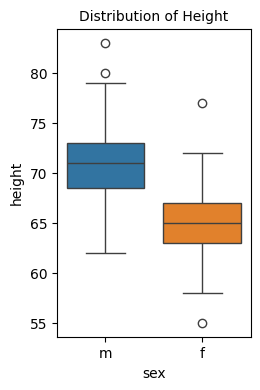

In [30]:
# distribution of height
plt.rcParams["figure.figsize"] = (2.5,4)

sns.boxplot(y=tinder_data.height, x=tinder_data.sex, hue=tinder_data.sex)
plt.title("Distribution of Height", size=10);

In [37]:
# potential male suitors for Madam Lisa

potential_male_suitors = tinder_data[(tinder_data.height >= 72) & (tinder_data.sex == "m")]
print("# of male profiles 6 foot and over", potential_male_suitors.shape[0])



# of male profiles 6 foot and over 329


In [39]:
# number of male profiles
tinder_data[tinder_data.sex == "m"].shape[0]

791

In [48]:
print(f"Percentage of profiles relevant for Madam Lisa {round(potential_male_suitors.shape[0]/tinder_data[tinder_data.sex == "m"].shape[0]*100,2)}%")

Percentage of profiles relevant for Madam Lisa 41.59%


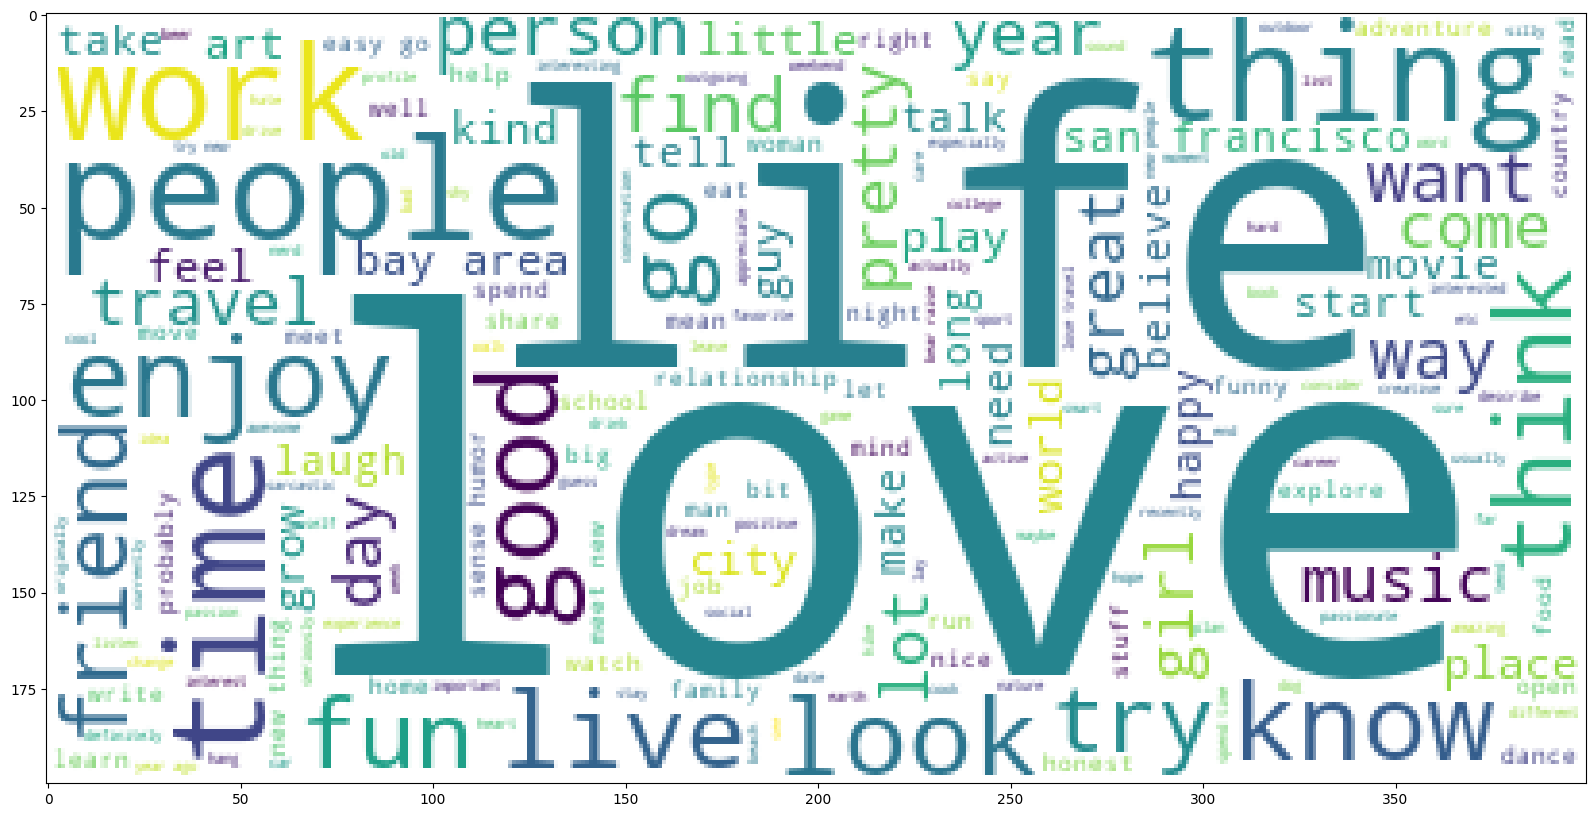

In [52]:
# explore the bio data

# view the most appearing words

import re
from wordcloud import WordCloud

# cleaned bio
tinder_data['cleaned_bio'].fillna("x", inplace=True)

# Join the different processed bios together.
long_string = ','.join(list(tinder_data['cleaned_bio'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, 
contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.show();

In [57]:
# looking for keywords that match Madam Lisa's interests

list(tinder_data[tinder_data['bio'].str.contains('galleries')].bio)

["i was born in akureyri, iceland, but moved to reykjavk while i was still a baby. i gravitated towards art from an early age, but it wasn't until recently that i decided to pursue it with earnestness. i moved to san francisco to study art about two years ago and i love it so far.  i enjoy walking along the embarcadero, going to art galleries, playing video- and board games, watching movies, reading books, and having a good, stimulating conversation over a drink or two.",
 'i never really fit any stereotypes growing up and i think that allowed me to get along with many different types of people- from a variety of ages, socio-economic backgrounds, ethnicity, etc. i consider myself more empathetic than most and practice the \'golden rule\' with strangers and acquaintances.  i value street smarts and spirituality/wisdom over book smarts. i\'d like to think i consider the "big-picture" a lot when it comes to making life decisions.  i think on the outside i probably look nerdy, skinny/asian

In [59]:
# potential profiles

len(list(tinder_data[tinder_data['bio'].str.contains('galleries')].bio))

5

In [58]:
list(tinder_data[tinder_data['bio'].str.contains('art')].bio)

["if you're looking for a fun, energetic, outgoing, and hardworking gentleman, we could get along great!  despite the fact that i love to be spontaneous and lead an active lifestyle, i am a goal oriented, and focused individual, who tries to do the best job that i can at everything that i do.  i like to try new restaurants, discover new places, and travel to new destinations. i've been to south america, china and india, but i would love to see more. and it would be even better to have a companion to join me!  i workout daily and stay in shape and be healthy.\xa0  i believe that respect should be mutual, as well as fairness and equality, in a relationship.  i am looking for a partner with a positive personality and a sense of humor, who is active, outgoing, and spontaneous like myself. someone who enjoys adventures, but is also content relaxing at home some nights as well. \xa0  my ideal match is a woman who is honest, trustworthy, and sincere, who appreciates being treated like a lady 

In [61]:
# potential profiles

len(list(tinder_data[tinder_data['bio'].str.contains('art')].bio))

557

In [62]:
len(list(tinder_data[tinder_data['bio'].str.contains('reading')].bio))

86

In [65]:
len(list(tinder_data[tinder_data['bio'].str.contains('cosy')].bio))

0

In [66]:
len(list(tinder_data[tinder_data['bio'].str.contains('fire')].bio))

12

In [67]:
list(tinder_data[tinder_data['bio'].str.contains('fire')].bio)

['i was discovering fire before it was cool.',
 'to the outward public i may seem more so a "librarian/geeky" type to those not intrigued. i love history, physics, & philosophy for example, but i can be very extroverted & playfully fiery, creative, outgoing, and extraordinary in my leisure, with those who are intrigued. yet, i am my own best friend alone in meditation and enjoy mellow intimate times of fireside pontification and guitars. my bike is a ten speed, so to speak, and my bohemian (artistic) nature can manifests in more ways than architectural design and fine art.  always naturally better at painting/drawing, right brained thinking, and gymnastics, the indian\'(native&vedic) in me very early developed a passion for eco concerns & optimal living or optimal anthropology (human symbiosis as opposed to misguided human conquest & plunder). i strive be as open, direct, objective, positive, constructive, productive, life affirming, and optimal as possible, coming from arian idealism 

In [68]:
list(tinder_data[tinder_data['bio'].str.contains('meditation')].bio)

["my story:  i am back from a 3-year stint in seattle for grad school. sad to leave that beautiful city and its wonderful people but excited to be back and start a new job here. i am looking forward to getting to know the city again in a new light... a new neighborhood, job, and decade of my life. with this spirit, i look forward to a new exploration of the city by bike and foot.  about me:  i'm super passionate and driven about social change, which is reflected in my career. making a positive impact in the world is really important to me and i know exactly how i want to do it. i'm grateful for this direction in life.  i'm a bit of a tomboy - rarely caught in a dress and never in high heels or make-up. i'm easy to sum up in a lot of ways with my love for kale, biking, recycling, and yoga (and disinterest in pop culture), but i'd like to think i'm more complex than that...it must be the fact that i'm a product of new age/hippie parents.  my personality:  pretty low-key but love to be go

In [69]:
list(tinder_data[tinder_data['bio'].str.contains('museum')].bio)

["i'm an ux designer who was born in san francisco and pretty much raised there, too. my profession means that most days i'm a jeans-and-a-tee kind of girl, but i also love dressing up when i get the chance.  i believe in perfectly al dente pasta, song lyrics that speak to the soul, and making a good first impression (though every impression after that should be good, too).  i am a self-diagnosed museum addict. i have a weakness for 19th century french paintings and more recently the works of the venetian masters. i'm trying hard to understand modern art, but some days, it just doesn't click. i would go to the academy of sciences every day if i could. partly for the penguins.",
 'map enthusiast. relic collector. history geek. shameless promoter. museum junkie. live music fanatic.',
 "i would consider myself as a pretty laid back kind of guy. though i like to get out every now and then, what i enjoy most is staying in and watching a terrible 'b' flick. i love to unwind on my days off as

In [70]:
list(tinder_data[tinder_data['bio'].str.contains('ice cream')].bio)

["hey, my name is jazmin! i always have a hard time with these things, so i'm gonna give this a shot. feel free to message me if you want to learn more because most likely, i will forget some things. i value: honesty, empathy, generosity, courage, merit, optimism, humbleness.... i love: my family, education, laughing, sense of humor, puns, puppies, nature, reading, watching movies, dancing, cards ( it's the best little present anyone can give), learning new cultures, languages, comedy, community service, chocolate (shocker, huh?), ice cream (gelato), adventures, free-spirited people, to be inspired, listening to stories, having an imagination, gerard butler, soccer... i can't stand: apathy, hypocrisy, lies, rudeness, discrimination/ intolerance, injustices, people who hurt others, arrogance...",
 "hmmm....well i've been traveling the coasts for a decent part of my life. grew up in marin ---> college in boston --> back to marin ---> grad school in boston ---> back to marin (in a couple 